In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("MODELADO.xlsx")

# 'EMIGRANTES' se convierte en clases 'bajo' y 'alto' según la mediana
mediana = df['EMIGRANTES'].median()
df['Clase_EMIGRANTES'] = df['EMIGRANTES'].apply(lambda x: 'alto' if x > mediana else 'bajo')

X = df[['PIB anual', 'PIB Per Capita', 'IDH', 'Esperanza de vida', 'Muertes', 'Tasa mortalidad']]
y = df['Clase_EMIGRANTES']

# Codifico etiquetas de clase
le = LabelEncoder()
y = le.fit_transform(y)

# Divido los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=178)

#modelo_arbol = DecisionTreeClassifier(random_state=42)

modelo_arbol = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=3,  max_features=None)
# Entreno el modelo
modelo_arbol.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)

# Evaluo el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)

print(f'Exactitud del modelo de árbol de decisión: {accuracy}')

print(classification_report(y_test, predicciones, target_names=df['Clase_EMIGRANTES'].unique()))

Exactitud del modelo de árbol de decisión: 0.875
              precision    recall  f1-score   support

        alto       1.00      0.71      0.83        14
        bajo       0.82      1.00      0.90        18

    accuracy                           0.88        32
   macro avg       0.91      0.86      0.87        32
weighted avg       0.90      0.88      0.87        32



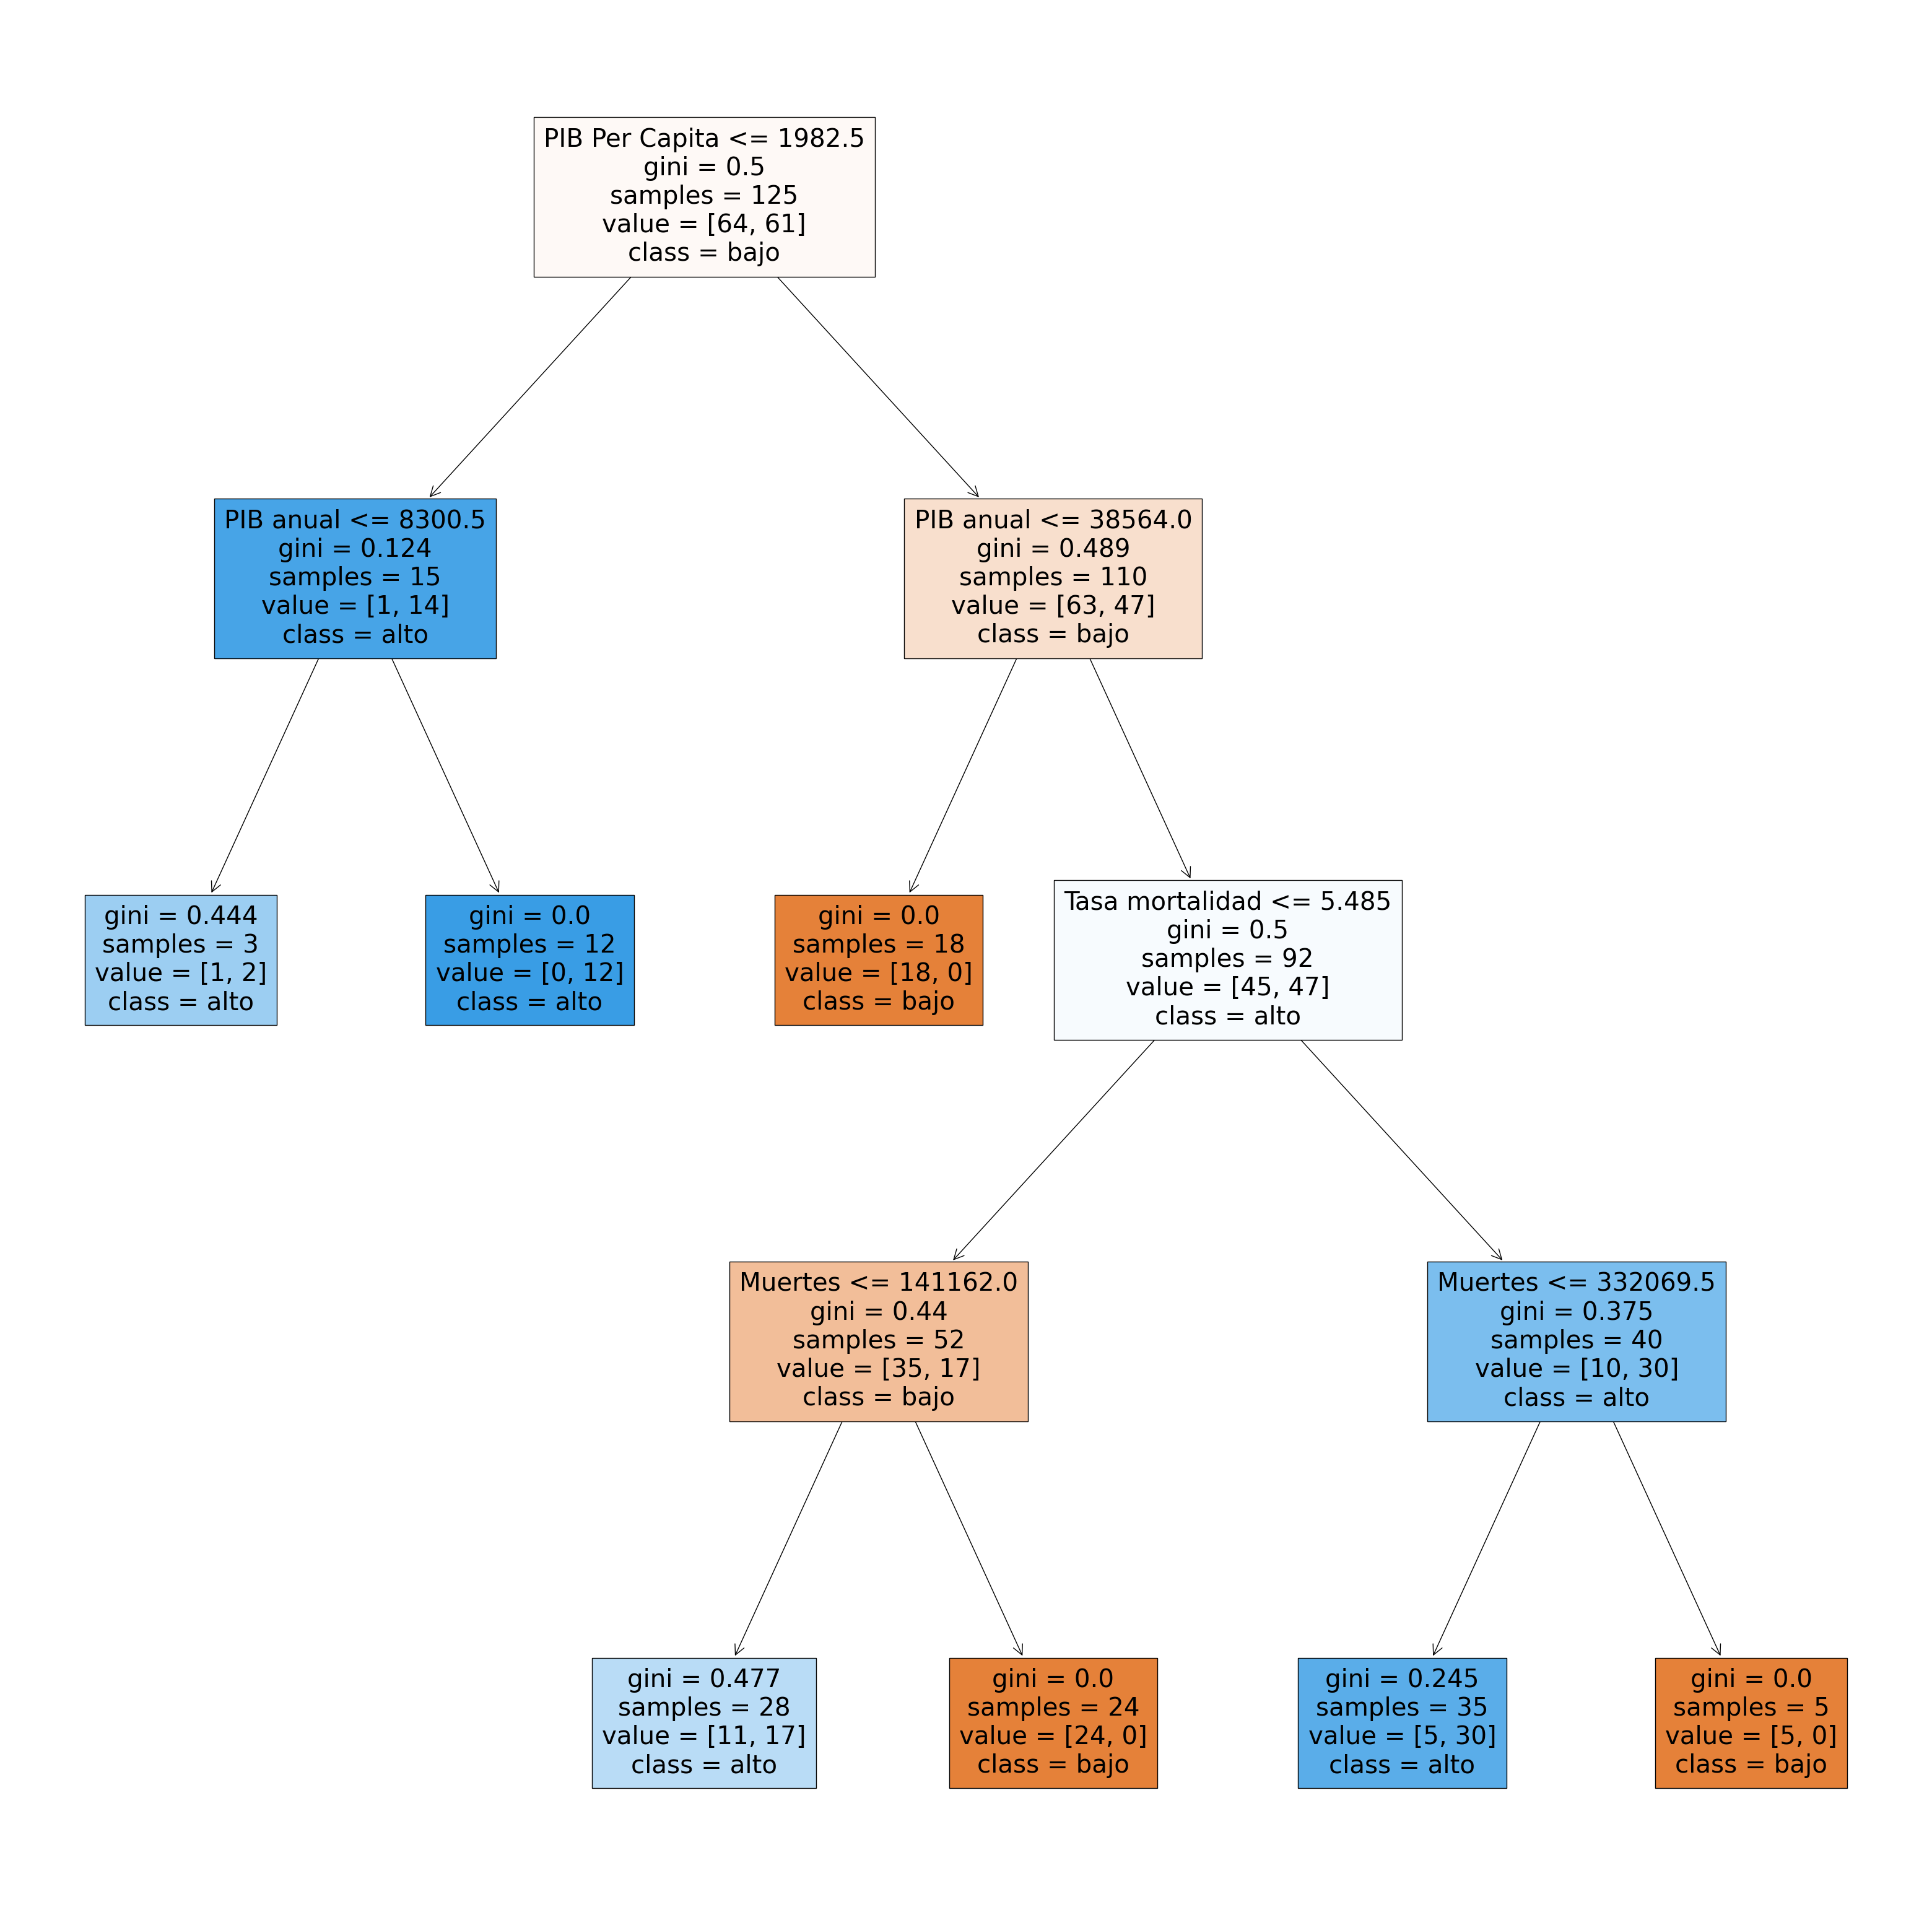

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (40,40))
plot_tree(modelo_arbol, feature_names=list(X.columns), class_names=["bajo", "alto"], filled=True)
plt.savefig('arbol_decision.jpg')
plt.show()

In [4]:
import joblib

joblib.dump(modelo_arbol, "modelo_arbol.pkl")

['modelo_arbol.pkl']

In [5]:
nueva_prediccion = pd.DataFrame({
    'PIB anual': [486702],
    'PIB Per Capita': [10625],
    'IDH': [0.842],
    'Esperanza de vida': [75.39],
    'Muertes': [410217],
    'Tasa mortalidad': [8.96]
})


prediccion_nueva = modelo_arbol.predict(nueva_prediccion)


prediccion_decodificada = le.inverse_transform(prediccion_nueva)

print(f'La predicción para el nuevo conjunto de datos es: {prediccion_decodificada[0]}')

La predicción para el nuevo conjunto de datos es: alto


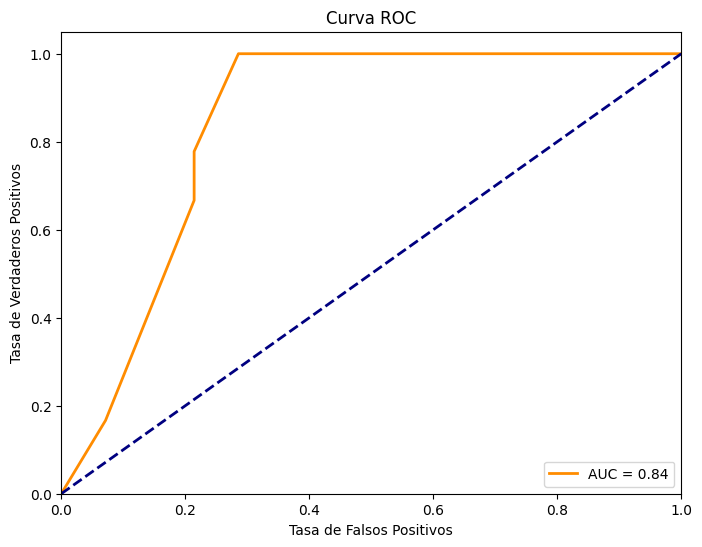

In [8]:
from sklearn.metrics import roc_curve, auc

probas = modelo_arbol.predict_proba(X_test)

probas_pos = probas[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas_pos)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()